<a href="https://colab.research.google.com/github/PiyushMankad/TCD-Computer-Vision/blob/master/CV_Question1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## please upload "shape.jpg"
from google.colab import files
uploaded = files.upload()


Getting all the image data.
Took Three images for evaluation.

*   High Contrast image
*   High Saturation image
*   Normal Geometric Image



In [0]:
import cv2
import io
import urllib
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!curl -o saturation.jpg https://live.staticflickr.com/3094/5755732663_ec8636e064_b.jpg
!curl -o contrast.jpg http://www.debsandidge.com/wp-content/uploads/2014/04/9zebra-resting-head.jpg

sat = mpimg.imread('saturation.jpg')
con = mpimg.imread('contrast.jpg')
img = cv2.imread("/content/shape.jpg")


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  379k  100  379k    0     0  2387k      0 --:--:-- --:--:-- --:--:-- 2387k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  289k  100  289k    0     0   289k      0  0:00:01  0:00:01 --:--:--  289k


# **Question 1.a**
Read RGB color Image and display it

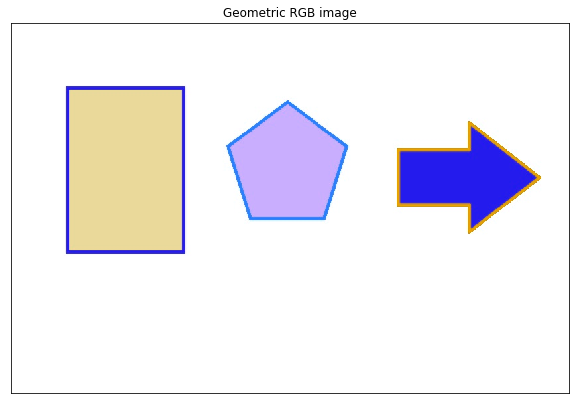

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 17 11:03:17 2019

@author: mankadp
"""

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

### Question 1.a
fig,axes = plt.subplots(1,1,figsize=(10,20),subplot_kw = {'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
axes.set_title("Geometric RGB image")
axes.imshow(img)
fig.show()

# **Question 1.b**
Convert the RGB image into Lab colour system and display each component (L,a,b) as an grey level image 

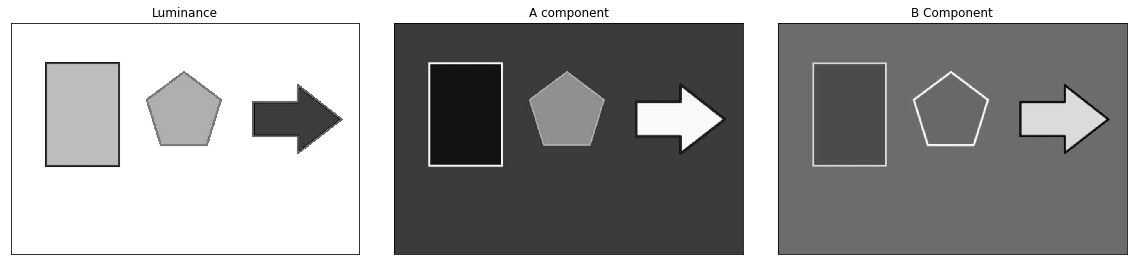

In [0]:
### Question 1.b
lab = cv2.cvtColor(img,cv2.COLOR_BGR2Lab)
lum=lab[:,:,0]
a=lab[:,:,1]
b=lab[:,:,2]

## converting high saturation and high contrast image also
sat_lab = cv2.cvtColor(sat,cv2.COLOR_BGR2Lab)
con_lab = cv2.cvtColor(con,cv2.COLOR_BGR2Lab)

fig,axes = plt.subplots(1,3,figsize=(20,30),subplot_kw = {'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
axes[0].set_title("Luminance")
axes[0].imshow(lum,cmap="gray")
axes[1].set_title("A component")
axes[1].imshow(a,cmap="gray")
axes[2].set_title("B Component")
axes[2].imshow(b,cmap="gray")
fig.show()

# **Question 1.c**
Compute the spatial derivatives of the luminance component L in the horizontal and
vertical direction using convolution by the derivatives of Gaussian filter. Display each
these derivatives as grey level images

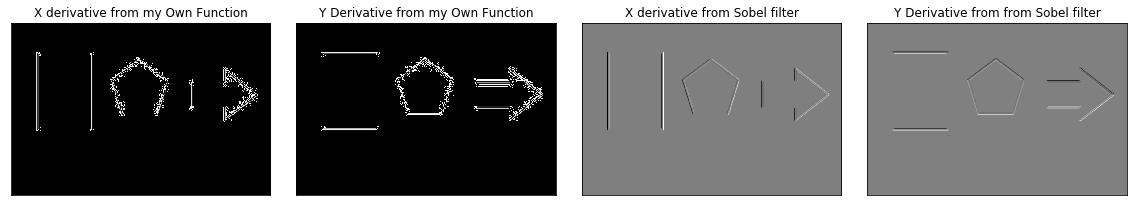

In [0]:
### Question 1.c - my function for X and Y derivatives
def convolution(matrix,kernel,Xderivative=True):
    rows,cols = matrix.shape
    stepY,stepX = kernel.shape
        
    ## Padding the image JUST IN CASE
    top = stepY - rows%stepY
    bottom = 0 
    left = stepX - cols%stepX
    right = 0
    matrix = cv2.copyMakeBorder(matrix, top, bottom, left, right, cv2.BORDER_CONSTANT, None, 0)
    
    rows,cols = matrix.shape
    s=0
    
   
    for row in range(0,rows,stepX):
        for col in range(0,cols,stepY):
            if Xderivative:
                matrix[row:row+stepX,col:col+stepY]=np.matmul(matrix[row:row+stepX,col:col+stepY],kernel)# X Derivative
            else:
                matrix[row:row+stepX,col:col+stepY]=np.matmul(kernel,matrix[row:row+stepX,col:col+stepY])# Y Derivative
            s+=1
                      
    return matrix
    


### Question 1.c
filterY=np.array([[-1,0,1],
                  [-2,0,2],
                  [-1,0,1]])

filterX =np.array([[-1,-2,-1,],
                    [0,0,0],
                    [1,2,1]])
    
## Computing X derivatives
lx_derivative = convolution(lum,filterX)# my own function that works
lx_derivative2 = cv2.Sobel(lum,cv2.CV_64F,1,0,ksize=5)

## Computing Y derivatives
ly_derivative = convolution(lum,filterY,False)# my own function that works
ly_derivative2 = cv2.Sobel(lum,cv2.CV_64F,0,1,ksize=5)

fig,axes = plt.subplots(1,4,figsize=(20,40),subplot_kw = {'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
axes[0].set_title("X derivative from my Own Function")
axes[0].imshow(lx_derivative,cmap="gray")
axes[1].set_title("Y Derivative from my Own Function")
axes[1].imshow(ly_derivative,cmap="gray")

axes[2].set_title("X derivative from Sobel filter")
axes[2].imshow(lx_derivative2,cmap="gray")
axes[3].set_title("Y Derivative from from Sobel filter")
axes[3].imshow(ly_derivative2,cmap="gray")
fig.show()
    

# **Question 1.d**
Compute a 2D histogram with the chrominance component (a,b) and display the
histogram as a grey image (heat map) and/or as a 3D surface (bar plot)



Grey image of the histogram


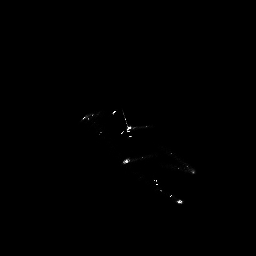

Grey image of the contrast histogram


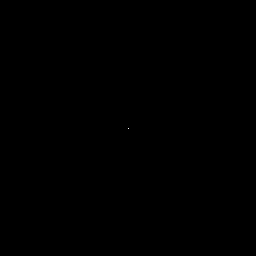

Grey image of the saturation histogram


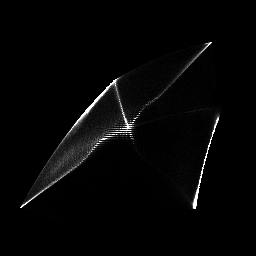

In [0]:

### Question 1.d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

hist = cv2.calcHist([lab],[1,2],None,[256,256],[0,256,0,256])
print("Grey image of the histogram")
cv2_imshow(hist)

con_hist = cv2.calcHist([con_lab],[1,2],None,[256,256],[0,256,0,256])
print("Grey image of the contrast histogram")
cv2_imshow(con_hist)

sat_hist = cv2.calcHist([sat_lab],[1,2],None,[256,256],[0,256,0,256])
print("Grey image of the saturation histogram")
cv2_imshow(sat_hist)


# **Question 1.e**
Using a part of the image to compute a 2D histogram model with the chrominance
component (a,b), compute a back projection map with this model histogram in the target
image

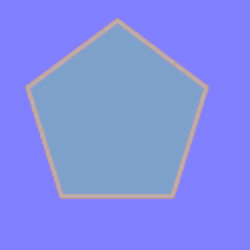

Back Projection


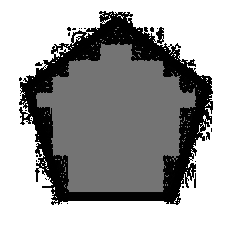

In [0]:

    ### Question 1.e
    target = lab[100:350,300:550]
    hist_target = cv2.calcHist([target],[1,2],None,[256,256],[0,256,0,256])
    cv2_imshow(target)
    cv2.normalize(hist_target,hist_target,0,255,cv2.NORM_MINMAX)
    backProjection = cv2.calcBackProject([target],[1,2],hist_target,[0,256,0,256],1)
    print("Back Projection")
    cv2_imshow(backProjection)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

# **Question 1.f**
Perform histogram equalization using 1D histogram using the luminance L computed in 1.a. Display the resulting image with enhanced contrast 

Equalized histogram


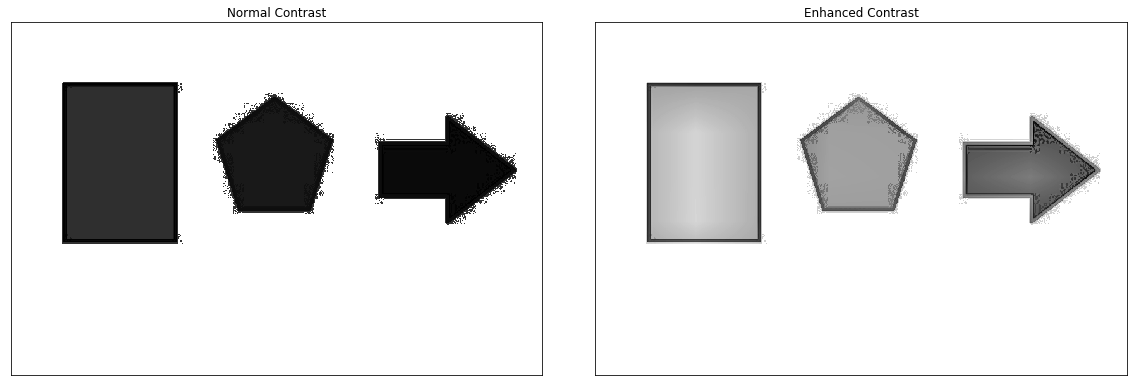

In [0]:
### Question 1.f
hist_l = np.histogram(lum.flatten(),256,[0,256])[0]

equalizehist = cv2.equalizeHist(lum)
print("Equalized histogram",)

clahe = cv2.createCLAHE()
equalize_hist = clahe.apply(lum)

fig,axes = plt.subplots(1,2,figsize=(20,40),subplot_kw = {'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
axes[0].set_title("Normal Contrast")
axes[0].imshow(equalizehist,cmap="gray")
axes[1].set_title("Enhanced Contrast")
axes[1].imshow(equalize_hist,cmap="gray")
fig.show()


# **Question 1.g**
Evaluate the performance of these techniques with histograms

*Evaluation*

A high saturation image under Enhanced contrast seems to break and appear blur.
While a high saturation image in under Enhanced contrast seams to have no change.

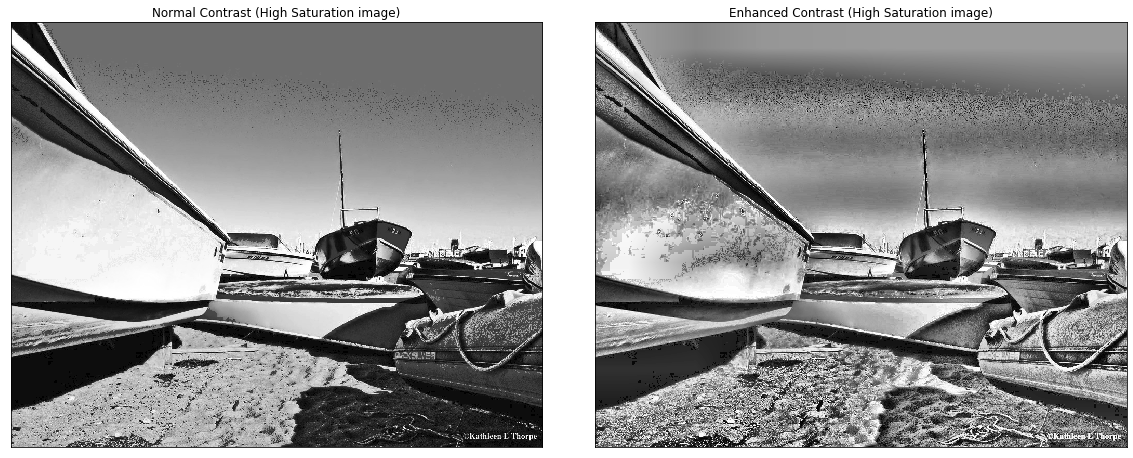

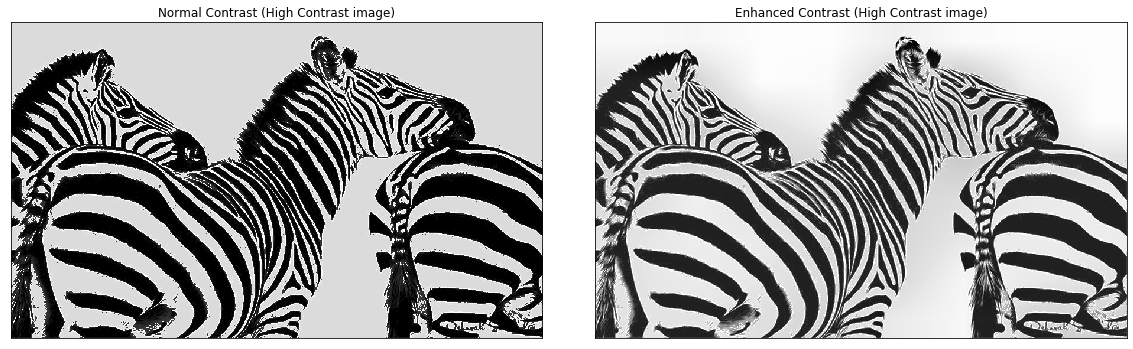

In [0]:
equalizehist_sat = cv2.equalizeHist(sat_lab[:,:,0])

clahe = cv2.createCLAHE()
equalize_hist_sat = clahe.apply(sat_lab[:,:,0])

fig,axes = plt.subplots(1,2,figsize=(20,40),subplot_kw = {'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
axes[0].set_title("Normal Contrast (High Saturation image)")
axes[0].imshow(equalizehist_sat,cmap="gray")
axes[1].set_title("Enhanced Contrast (High Saturation image)")
axes[1].imshow(equalize_hist_sat,cmap="gray")
fig.show()

equalizehist_sat = cv2.equalizeHist(con_lab[:,:,0])

clahe = cv2.createCLAHE()
equalize_hist_sat = clahe.apply(con_lab[:,:,0])

fig,axes = plt.subplots(1,2,figsize=(20,40),subplot_kw = {'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
axes[0].set_title("Normal Contrast (High Contrast image)")
axes[0].imshow(equalizehist_sat,cmap="gray")
axes[1].set_title("Enhanced Contrast (High Contrast image)")
axes[1].imshow(equalize_hist_sat,cmap="gray")
fig.show()
